In [1]:
"""
Python可视化matplotlib&seborn14-热图heatmap
原创 pythonic生物人 pythonic生物人 2020-07-31 07:18

热力图（heatmap）可通过颜色深浅变化，优雅的展示数据的差异；
本篇详细介绍python seaborn绘制热图（手把手讲解）。

1、matplotlib绘制热图

2、seaborn绘制热图 

2.0 数据集准备

2.1 seaborn绘制heatmap 
2.1.1 seaborn默认参数绘制hetmap
2.1.2 colorbar（图例）范围修改：vmin、vmax
2.1.3 修改热图颜色盘（colormap）：cmp
使用matplotlib中colormap

使用Seaborn颜色盘 

使用palettable库中颜色盘 

2.1.4 修改图例中心数据值大小：center
2.1.5 热图中文本开关：annot
2.1.6 格子中数据的格式化输出：fmt
2.1.7 格子中数据（字体大小、磅值、颜色）等设置：annot_kws
2.1.8 格子外框宽度、颜色设置：linewidths、linecolor
2.1.9 图例开关：cbar
2.1.10 图例位置、名称、标签等设置：cbar_kws
2.1.11 热图中只显示部分符合条件的数据：mask
2.1.12 自定义x轴、y轴标签：xticklabels、yticklabels
3、seaborn.heatmap所有参数详解代码
"""
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""
1、matplotlib绘制热图
matplotlib可通过以下两种方法绘制heamap；

matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
原始效果图，挺丑陋的；请浏览微信帖子查看或查看文件：
热图原始效果图.jpg

改进后效果图（虽然要写很多辅助函数实现，但是可以很好的实现自定义热图，需要高度个性化的小伙伴可以去摸索）； 
改进后效果图1.jpg
改进后效果图2.jpg

2、seaborn绘制热图
seaborn在matplotlib的基础上封装了个seaborn.heatmap，非常傻瓜式操作，我等调包侠的福音，效果可以赶得上R语言了，不逼逼，下面上干货：

2.0 数据集准备
使用鸢尾花iris数据集，数据集详细介绍请戳：鸢尾花iris数据集；
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import palettable#python颜色库
from sklearn import datasets 

plt.rcParams['font.sans-serif']=['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示中文

iris=datasets.load_iris()
x, y = iris.data, iris.target
pd_iris = pd.DataFrame(np.hstack((x, y.reshape(150, 1))),
                       columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'] )

plt.figure(dpi=200, figsize=(10,6))
data1 = np.array(pd_iris['sepal length(cm)']).reshape(25,6)#Series转np.array


df = pd.DataFrame(data1, 
                  index=[chr(i) for i in range(65, 90)],#DataFrame的行标签设置为大写字母
                  columns=["a","b","c","d","e","f"])#设置DataFrame的列标签
#用来绘制热图的数据集是什么样子的？其实就是取iris中的一列（150个值），转化为一个25x6的DataFrame数据集，如下：
print(df.shape)
df.head()

(25, 6)


,a,b,c,d,e,f
A,5.1,4.9,4.7,4.6,5.0,5.4
B,4.6,5.0,4.4,4.9,5.4,4.8
C,4.8,4.3,5.8,5.7,5.4,5.1
D,5.7,5.1,5.4,5.1,4.6,5.1
E,4.8,5.0,5.0,5.2,5.2,4.7


<Figure size 2000x1200 with 0 Axes>

Text(0.5, 1.0, '所有参数默认')

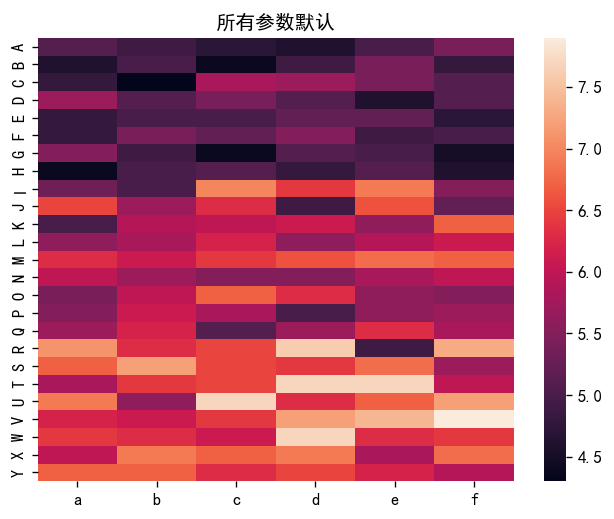

In [3]:
"""
2.1 seaborn绘制heatmap
语法：seaborn.heatmap
2.1.1 seaborn默认参数绘制hetmap
"""
plt.figure(dpi=120)
sns.heatmap(data=df,#矩阵数据集，数据的index和columns分别为heatmap的y轴方向和x轴方向标签               
         )
plt.title('所有参数默认')

Text(0.5, 1.0, '右侧colorbar显示范围修改：vmin、vmax')

<Figure size 640x480 with 0 Axes>

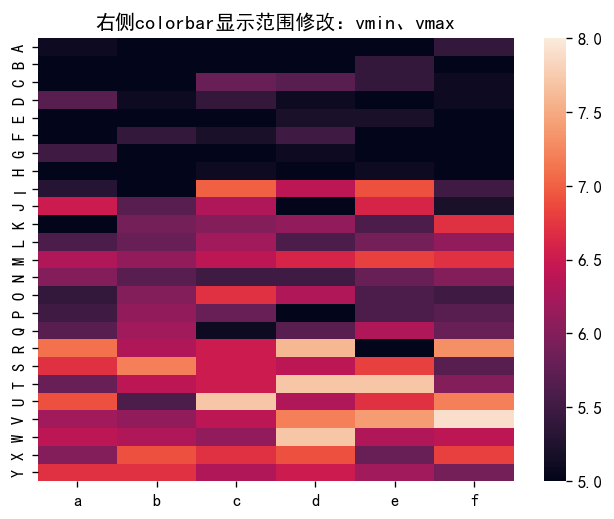

In [4]:
"""
2.1.2 colorbar（图例）范围修改：vmin、vmax
"""
#右侧colorbar范围修改
#注意colorbar范围变化，左图颜色随之变化
plt.clf()
plt.figure(dpi=120)
sns.heatmap(data=df,#矩阵数据集，数据的index和columns分别为heatmap的y轴方向和x轴方向标签
                 vmin=5,#图例（右侧颜色条color bar）中最小显示值 
                 vmax=8,#图例（右侧颜色条color bar）中最大显示值
           )
plt.title('右侧colorbar显示范围修改：vmin、vmax') 

Text(0.5, 1.0, "使用matplotlib中的颜色盘：cmap=plt.get_cmap('Set3')")

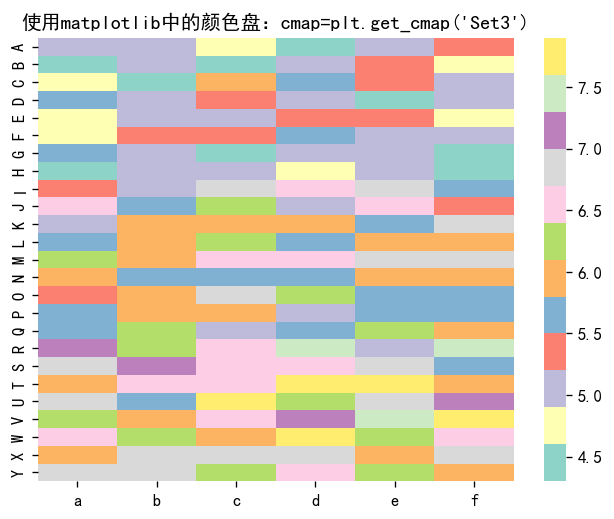

In [5]:
"""
2.1.3 修改热图颜色盘（colormap）：cmp
感觉默认颜色太丑陋，可以换个颜色盘，cmp参数控制hetmap颜色；
可以使用matplotlib颜色盘、seaborn颜色盘、palettable库中颜色盘

使用matplotlib中colormap
了解matplotlib中所有colormap请戳：matplotlib中colormap使用详解
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=plt.get_cmap('Set3'),#使用matplotlib中的颜色盘
           )
plt.title("使用matplotlib中的颜色盘：cmap=plt.get_cmap('Set3')")

Text(0.5, 1.0, "使用matplotlib中的颜色盘：cmap=plt.get_cmap('tab20c')")

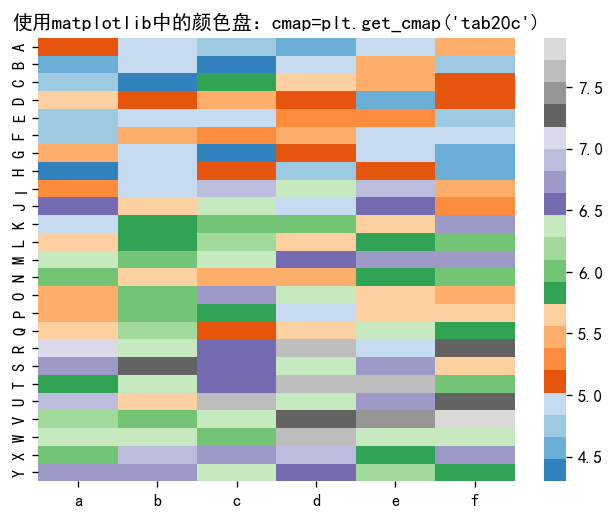

In [6]:
# 感觉颜色还是丑，那就再换个
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=plt.get_cmap('tab20c'),#matplotlib中的颜色盘'tab20c'
           )
plt.title("使用matplotlib中的颜色盘：cmap=plt.get_cmap('tab20c')")

Text(0.5, 1.0, "使用matplotlib中的颜色盘：cmap=plt.get_cmap('Greens')")

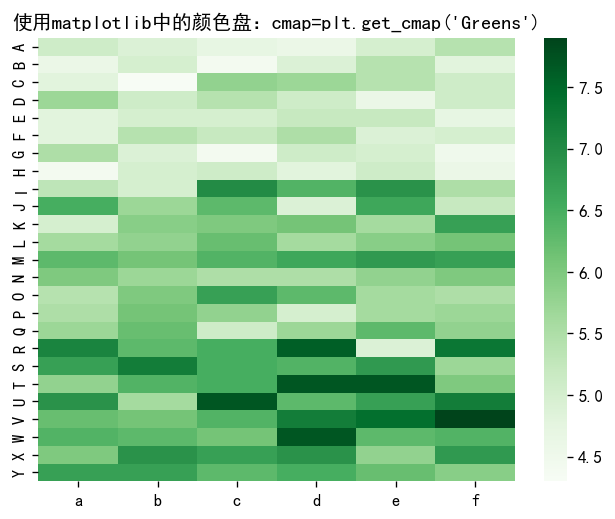

In [7]:
#感觉太油腻，太花哨，那就来个纯一点的（色度依次增加，请看右边图例颜色变化）
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=plt.get_cmap('Greens'),#matplotlib中的颜色盘'Greens'
           )
plt.title("使用matplotlib中的颜色盘：cmap=plt.get_cmap('Greens')")

Text(0.5, 1.0, "使用matplotlib中的颜色盘：cmap=plt.get_cmap('Greens_r')")

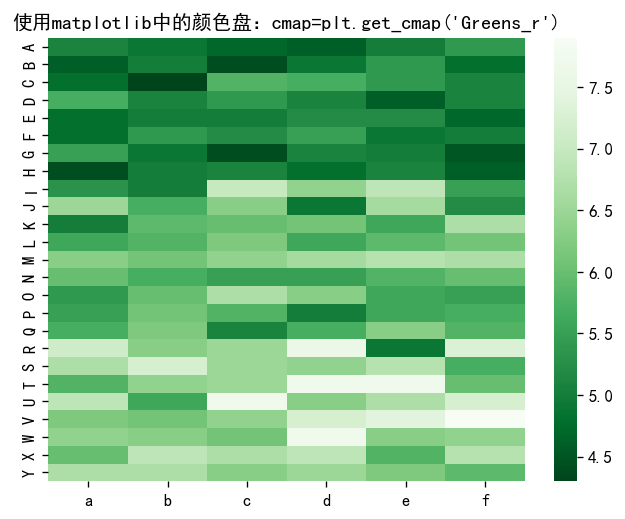

In [8]:
#色度依次递减，注意比较右边图例颜色变化
plt.figure(dpi=120)
sns.heatmap(data=df,                 
            #cmap选取的颜色条，有的是由浅到深（'Greens'），有的是相反的（'Greens_r'）
            cmap=plt.get_cmap('Greens_r'),#matplotlib中的颜色盘'Greens_r'
           )
plt.title("使用matplotlib中的颜色盘：cmap=plt.get_cmap('Greens_r')")

Text(0.5, 1.0, "使用seaborn dark颜色盘：cmap=sns.dark_palette('#2ecc71', as_cmap=True)")

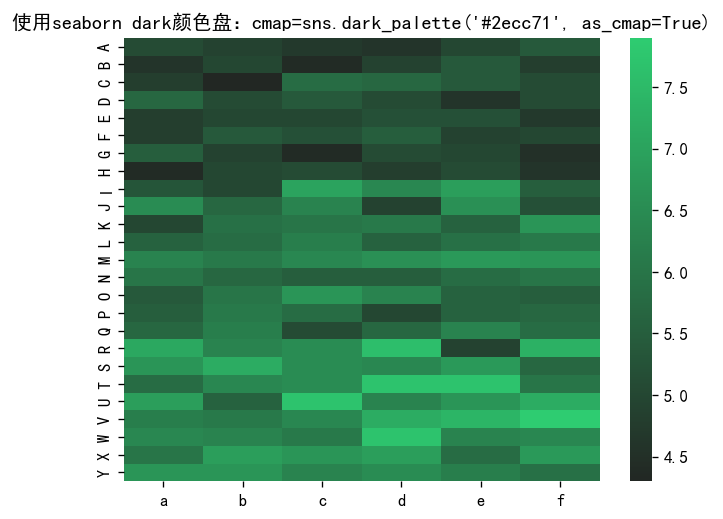

In [10]:
#使用Seaborn颜色盘
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=sns.dark_palette("#2ecc71", as_cmap=True),#seaborn 深色色盘：sns.dark_palette使用
           )
plt.title("使用seaborn dark颜色盘：cmap=sns.dark_palette('#2ecc71', as_cmap=True)")

Text(0.5, 1.0, "使用seaborn light颜色盘：sns.light_palette('#2ecc71', as_cmap=True)")

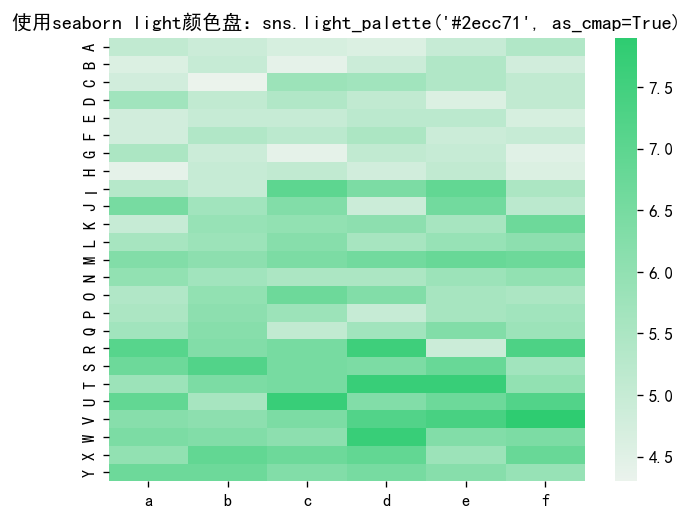

In [11]:
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=sns.light_palette("#2ecc71", as_cmap=True),#淡色色盘：sns.light_palette()使用
           )
plt.title("使用seaborn light颜色盘：sns.light_palette('#2ecc71', as_cmap=True)")

Text(0.5, 1.0, '使用seaborn diverging颜色盘：sns.diverging_palette(10, 220, sep=80, n=7)')

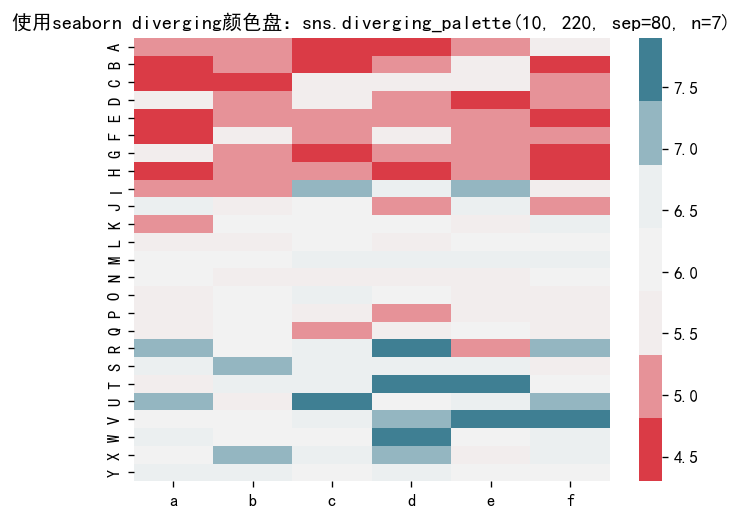

In [12]:
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=sns.diverging_palette(10, 220, sep=80, n=7),#区分度显著色盘：sns.diverging_palette()使用
           )
plt.title("使用seaborn diverging颜色盘：sns.diverging_palette(10, 220, sep=80, n=7)")


Text(0.5, 1.0, '使用seaborn cubehelix颜色盘：sns.diverging_palette(220, 20, sep=20, as_cmap=True)')

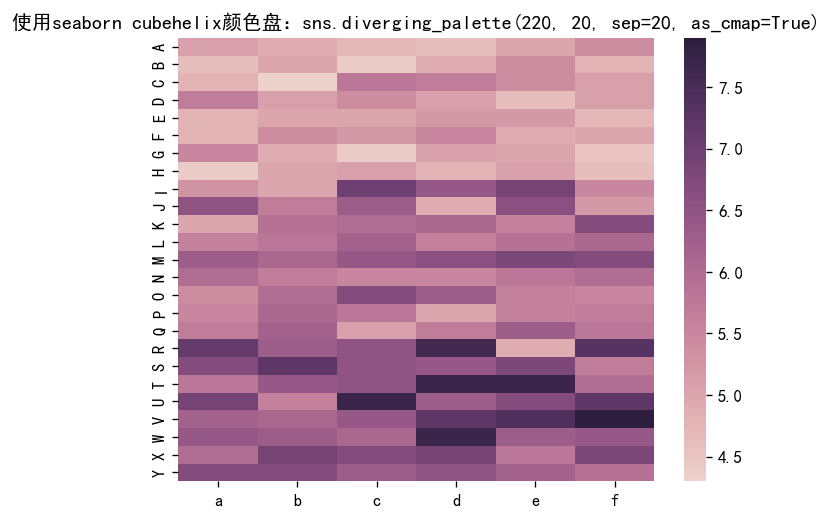

In [13]:
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=sns.cubehelix_palette(as_cmap=True),#渐变色盘：sns.cubehelix_palette()使用
           )
plt.title("使用seaborn cubehelix颜色盘：sns.diverging_palette(220, 20, sep=20, as_cmap=True)")

Text(0.5, 1.0, '使用palettable库颜色盘：palettable.cartocolors.diverging.ArmyRose_7.mpl_colors')

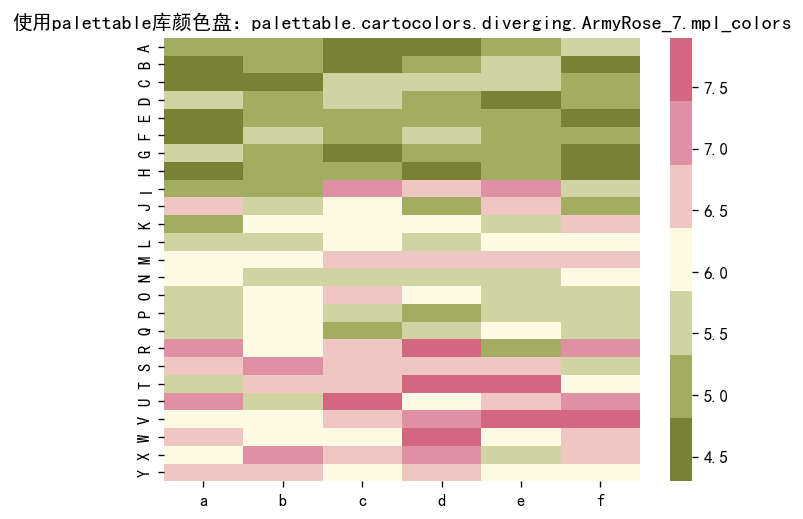

In [14]:
"""
使用palettable库中颜色盘
关于python palettable库使用请戳：python Palettable库使用详解
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,#使用palettable库中颜色条
           )
plt.title("使用palettable库颜色盘：palettable.cartocolors.diverging.ArmyRose_7.mpl_colors")

Text(0.5, 1.0, '使用palettable库颜色盘：palettable.cmocean.diverging.Curl_10.mpl_colors')

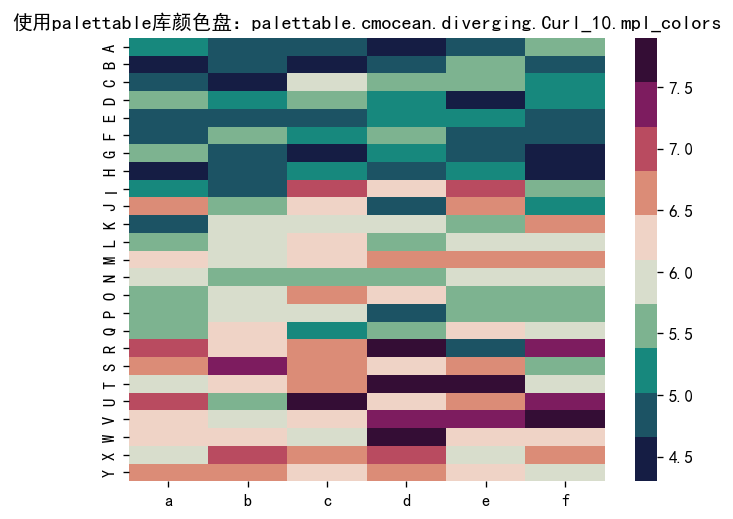

In [15]:
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,#使用palettable库中颜色条
           )
plt.title("使用palettable库颜色盘：palettable.cmocean.diverging.Curl_10.mpl_colors")

Text(0.5, 1.0, '使用palettable库颜色盘：palettable.tableau.TrafficLight_9.mpl_colors')

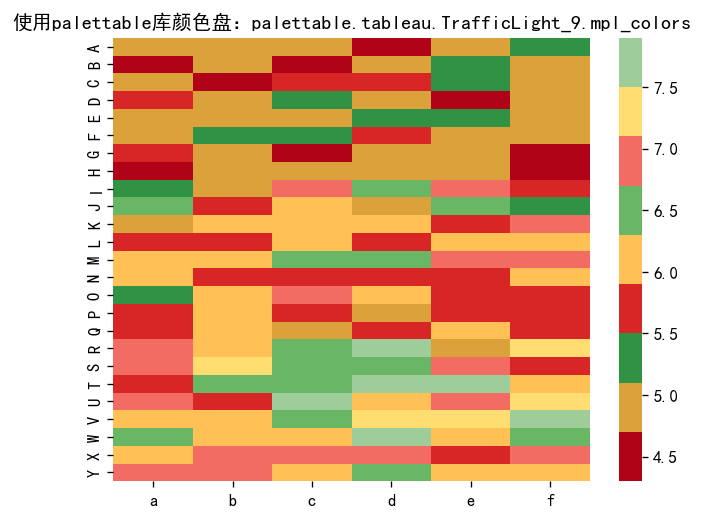

In [16]:
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.tableau.TrafficLight_9.mpl_colors,#使用palettable库中颜色条
           )
plt.title("使用palettable库颜色盘：palettable.tableau.TrafficLight_9.mpl_colors")


Text(0.5, 1.0, 'color bar的中心数据值大小：center')

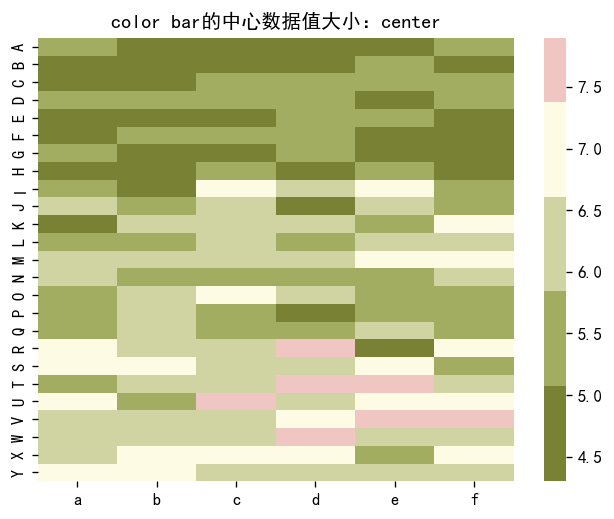

In [17]:
"""
2.1.4 修改图例中心数据值大小：center
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            center=7,#color bar的中心数据值大小，可以控制整个热图的颜盘深浅
           )
plt.title("color bar的中心数据值大小：center")

Text(0.5, 1.0, '每个格子写入data中数据：annot=True')

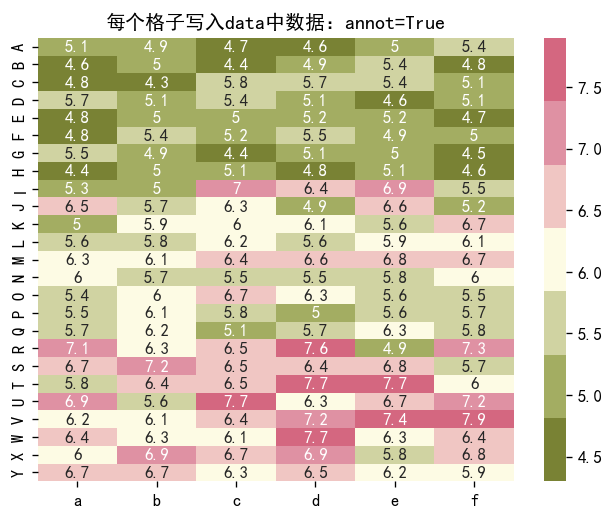

In [18]:
"""
2.1.5 热图中文本开关：annot
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            annot=True,#默认为False，当为True时，在每个格子写入data中数据
           )
plt.title("每个格子写入data中数据：annot=True")

Text(0.5, 1.0, '格子中数据的格式化输出：fmt')

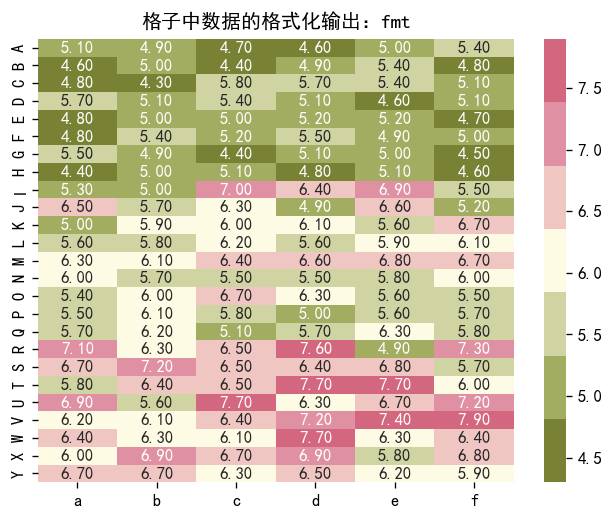

In [19]:
"""
2.1.6 格子中数据的格式化输出：fmt
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            annot=True,#默认为False，当为True时，在每个格子写入data中数据
            fmt=".2f",#设置每个格子中数据的格式，参考之前的文章，此处保留两位小数
           )
plt.title("格子中数据的格式化输出：fmt")

Text(0.5, 1.0, '格子中数据（字体大小、磅值、颜色）等设置：annot_kws')

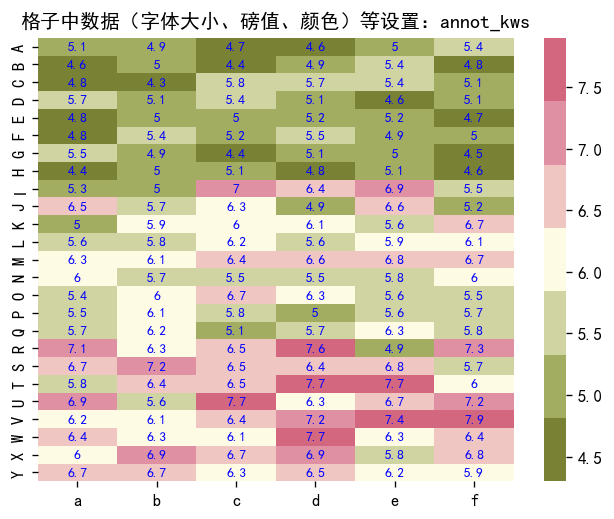

In [20]:
"""
2.1.7 格子中数据（字体大小、磅值、颜色）等设置：annot_kws
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            annot=True,#默认为False，当为True时，在每个格子写入data中数据
            annot_kws={'size':8,'weight':'normal', 'color':'blue'},#设置格子中数据的大小、粗细、颜色
           )
plt.title("格子中数据（字体大小、磅值、颜色）等设置：annot_kws")

Text(0.5, 1.0, '格子外框宽度、颜色设置：linewidths、linecolor')

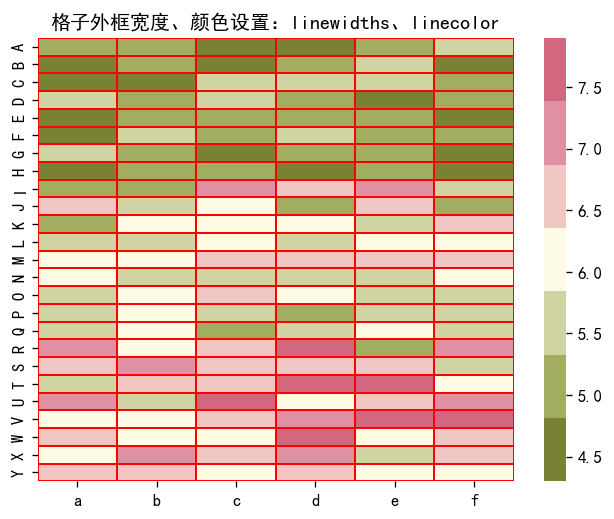

In [21]:
"""
2.1.8 格子外框宽度、颜色设置：linewidths、linecolor
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            linewidths=1,#每个格子边框宽度，默认为0
            linecolor='red',#每个格子边框颜色,默认为白色
            
           )
plt.title("格子外框宽度、颜色设置：linewidths、linecolor")

Text(0.5, 1.0, '图例开关：cbar')

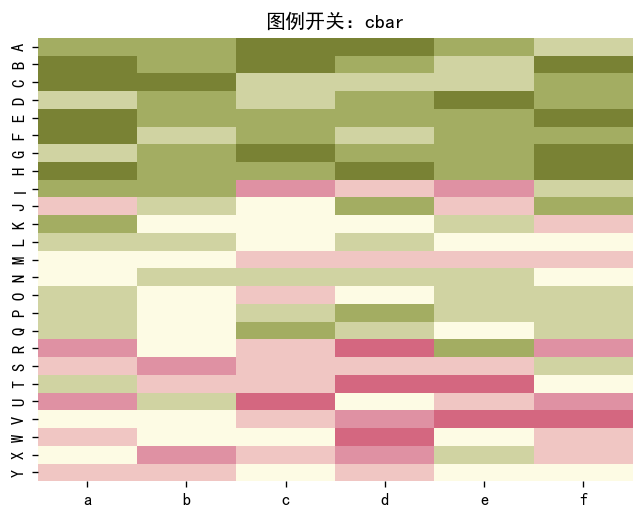

In [22]:
"""
2.1.9 图例开关：cbar
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            cbar=False,#右侧图例(color bar)开关，默认为True显示
           )
plt.title("图例开关：cbar")

Text(0.5, 1.0, '图例位置、名称、标签等设置：cbar_kws')

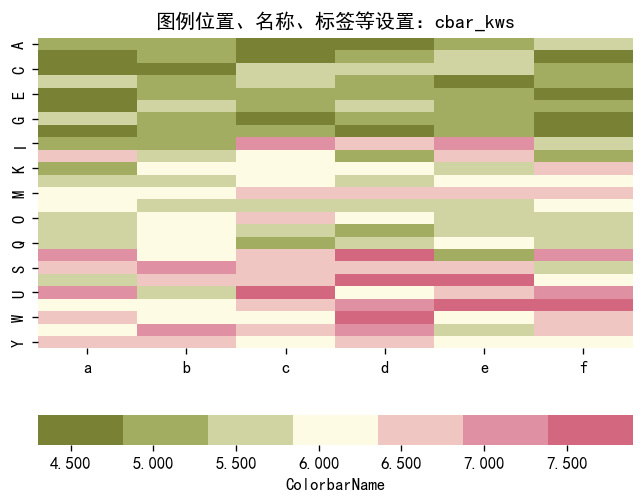

In [23]:
"""
2.1.10 图例位置、名称、标签等设置：cbar_kws
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            cbar=True,
            cbar_kws={'label': 'ColorbarName', #color bar的名称
                           'orientation': 'horizontal',#color bar的方向设置，默认为'vertical'，可水平显示'horizontal'
                           "ticks":np.arange(4.5,8,0.5),#color bar中刻度值范围和间隔
                           "format":"%.3f",#格式化输出color bar中刻度值
                           "pad":0.15,#color bar与热图之间距离，距离变大热图会被压缩
                                                   },
            
           )
plt.title("图例位置、名称、标签等设置：cbar_kws")

Text(0.5, 1.0, '热图中只显示部分符合条件的数据：mask')

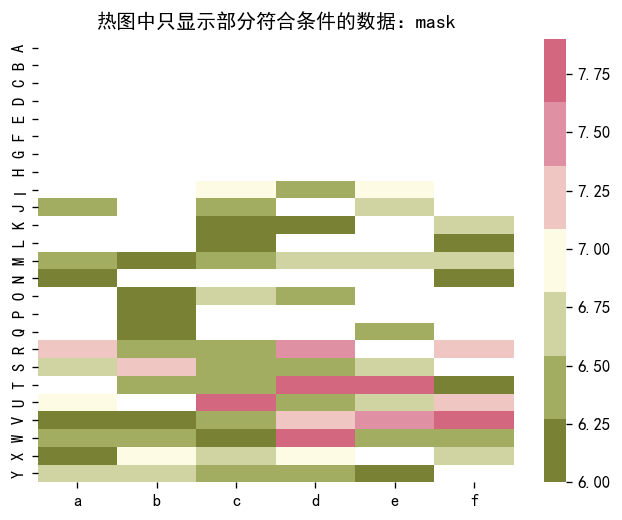

In [24]:
"""
2.1.11 热图中只显示部分符合条件的数据：mask
"""
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            mask=df<6.0,#热图中显示部分数据：显示数值小于6的数据 
         )
plt.title("热图中只显示部分符合条件的数据：mask")

Text(0.5, 1.0, '自定义x轴、y轴标签：xticklabels、yticklabels')

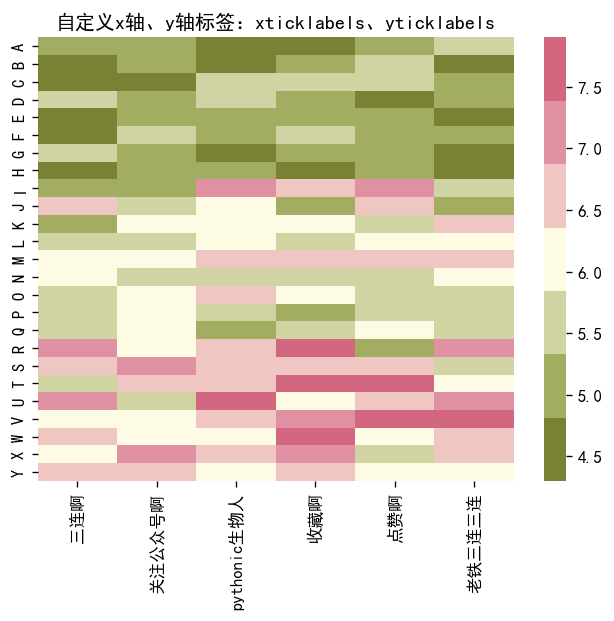

In [25]:
"""
2.1.12 自定义x轴、y轴标签：xticklabels、yticklabels
"""
# linewidths、linecolor参数
plt.figure(dpi=120)
sns.heatmap(data=df,
            cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
            xticklabels=['三连啊','关注公众号啊','pythonic生物人','收藏啊','点赞啊','老铁三连三连'] , #x轴方向刻度标签开关、赋值，可选“auto”, bool, list-like（传入列表）, or int,
            yticklabels=True, #y轴方向刻度标签开关、同x轴
         )
plt.title("自定义x轴、y轴标签：xticklabels、yticklabels")
#['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'] 

In [ ]:
"""
3、seaborn.heatmap所有参数详解代码
感兴趣的小火伴，可以关注我的公众号免费获取源代码：
seaborn.heatmap所有参数详解代码.png

4、参考资料
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow
http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
本篇结束，下一篇详细介绍聚类热图，感兴趣小伙伴欢迎跟踪我。
"""